### importing modules

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("data.csv")

In [50]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [51]:
df.columns = df.columns.str.strip()

In [52]:
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

### Preporcessing Data

In [53]:
df.corr()["Bankrupt?"].abs().sort_values(ascending=False).head(25)

Bankrupt?                                                  1.000000
Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                    0.219560
Retained Earnings to Total Assets                          0.217779
Net profit before tax/Paid-in capital                      0.207857
Per Share Net profit before tax (Yuan ¥)                   0.201395
Current Liability to Assets                                0.194494
Working Capital to Total Assets                            0.193083
Net Income to Stockholder's Equity                         0.180987
Borrowing dependency                            

In [54]:
columns25 = df.corr()["Bankrupt?"].abs().sort_values(ascending=False).head(25)

In [55]:
selected = columns = [
    "Bankrupt?",
    "Net Income to Total Assets",
    "Net worth/Assets",
    "Retained Earnings to Total Assets",
    "Net profit before tax/Paid-in capital",
    "Working Capital to Total Assets",
    "Net Income to Stockholder's Equity",
    "Current Liability to Current Assets",
    "Liability to Equity",
    "Net Value Per Share (A)",
   "Current Liability to Assets",
]


In [56]:
df25 = df[selected]

In [57]:
df25.corr()["Bankrupt?"].abs().sort_values(ascending=False)

Bankrupt?                                1.000000
Net Income to Total Assets               0.315457
Net worth/Assets                         0.250161
Retained Earnings to Total Assets        0.217779
Net profit before tax/Paid-in capital    0.207857
Current Liability to Assets              0.194494
Working Capital to Total Assets          0.193083
Net Income to Stockholder's Equity       0.180987
Current Liability to Current Assets      0.171306
Liability to Equity                      0.166812
Net Value Per Share (A)                  0.165465
Name: Bankrupt?, dtype: float64

<Axes: >

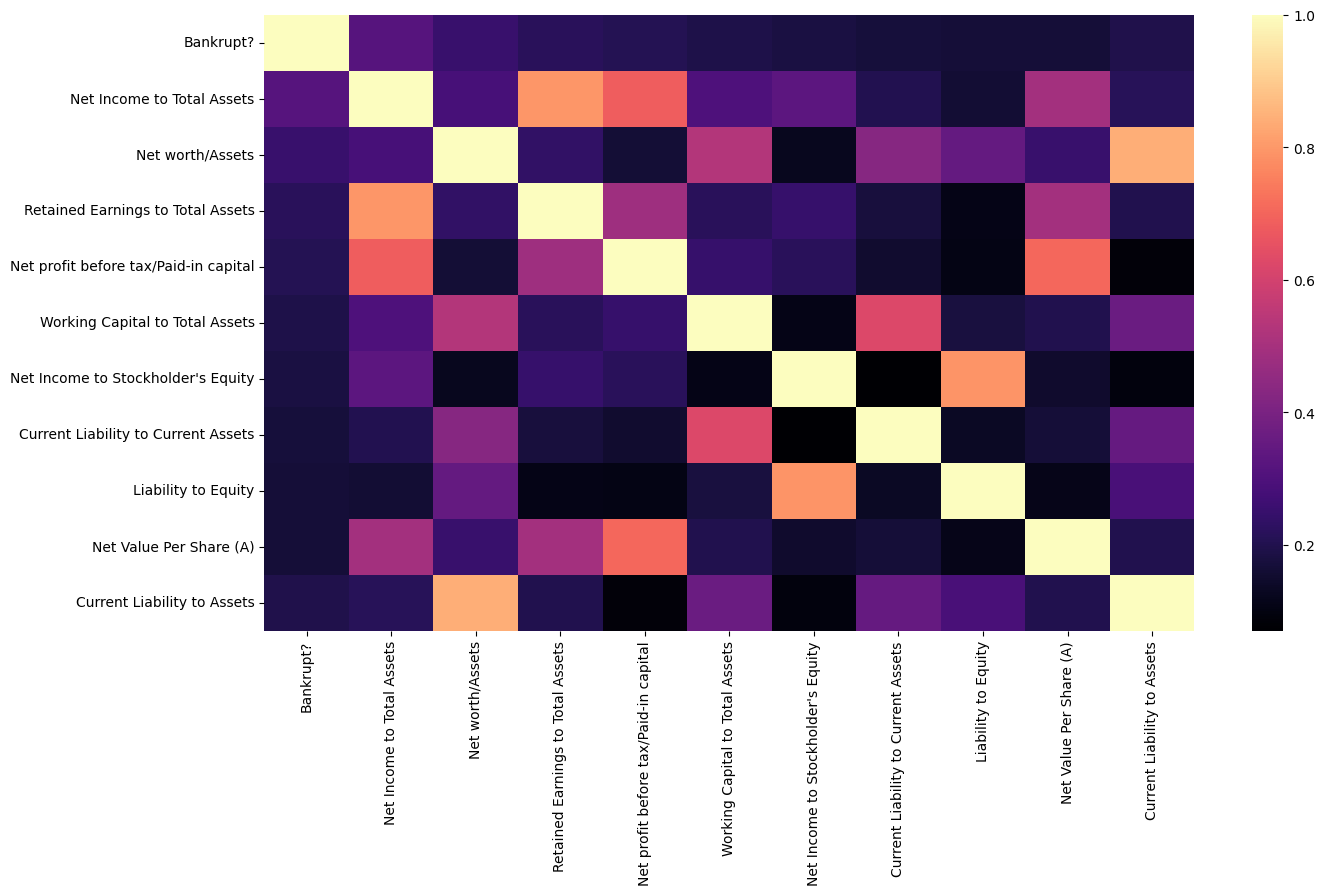

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(df25.corr().abs(), cmap="magma")

In [59]:
print(df25.isnull().sum())


Bankrupt?                                0
Net Income to Total Assets               0
Net worth/Assets                         0
Retained Earnings to Total Assets        0
Net profit before tax/Paid-in capital    0
Working Capital to Total Assets          0
Net Income to Stockholder's Equity       0
Current Liability to Current Assets      0
Liability to Equity                      0
Net Value Per Share (A)                  0
Current Liability to Assets              0
dtype: int64


### Model Preprocessing

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [61]:
X = df25.drop("Bankrupt?", axis=1)
y = df25["Bankrupt?"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Random Forest 

In [63]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest_predicitons = random_forest.predict(X_test)

In [64]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, random_forest_predicitons))

# Classification Report
print("Classification Report:\n", classification_report(y_test, random_forest_predicitons))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, random_forest_predicitons))


Accuracy: 0.9604105571847508
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1303
           1       0.82      0.15      0.25        61

    accuracy                           0.96      1364
   macro avg       0.89      0.57      0.61      1364
weighted avg       0.96      0.96      0.95      1364

Confusion Matrix:
 [[1301    2]
 [  52    9]]


### Logistic regression unscaled, balanced

In [65]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', random_state=7)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)


In [66]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8504398826979472
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      1303
           1       0.22      0.90      0.35        61

    accuracy                           0.85      1364
   macro avg       0.61      0.87      0.63      1364
weighted avg       0.96      0.85      0.89      1364



### Improving the random forest

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to test
    cv=3,       # Fewer cross-validation folds
    scoring='recall',  # Optimize for recall
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 77}


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

final_rf = RandomForestClassifier(
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=77,
    random_state=42
)

final_rf.fit(X_train, y_train)

# Make predictions
y_pred = final_rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9420821114369502
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1303
           1       0.40      0.62      0.49        61

    accuracy                           0.94      1364
   macro avg       0.69      0.79      0.73      1364
weighted avg       0.96      0.94      0.95      1364

Confusion Matrix:
 [[1247   56]
 [  23   38]]


In [69]:
y_prob = final_rf.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.4 instead of 0.5)
custom_threshold = 0.4
y_pred_custom = (y_prob > custom_threshold).astype(int)

# Evaluate the model with the new threshold
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1303
           1       0.38      0.69      0.49        61

    accuracy                           0.94      1364
   macro avg       0.68      0.82      0.73      1364
weighted avg       0.96      0.94      0.94      1364

Confusion Matrix:
 [[1235   68]
 [  19   42]]


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      1303
           1       0.23      0.89      0.37        61

    accuracy                           0.86      1364
   macro avg       0.61      0.87      0.65      1364
weighted avg       0.96      0.86      0.90      1364

Confusion Matrix:
 [[1125  178]
 [   7   54]]


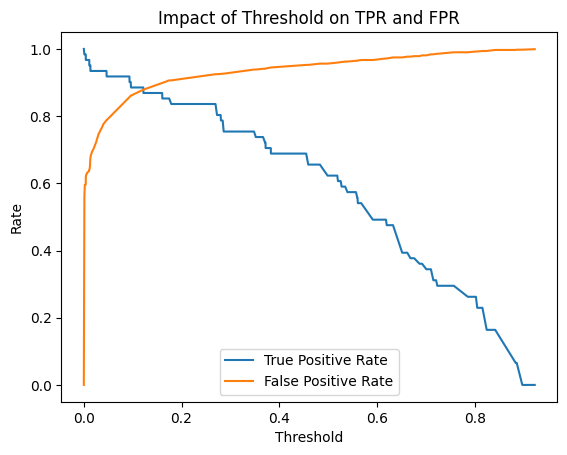

In [70]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# Predict probabilities for the test set
y_prob = final_rf.predict_proba(X_test)[:, 1]  # Probabilities for Class 1

# Fine-tune the threshold
custom_threshold = 0.1  # Adjust this value to balance precision and recall
y_pred_custom = (y_prob > custom_threshold).astype(int)

# Evaluate the model with the adjusted threshold
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))

# ROC curve to visualize threshold impact
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(thresholds, tpr, label="True Positive Rate")
plt.plot(thresholds, 1 - fpr, label="False Positive Rate")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("Impact of Threshold on TPR and FPR")
plt.legend()
plt.show()


In [71]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities for Class 1 (Bankrupt)
y_prob = final_rf.predict_proba(X_test)[:, 1]

# Adjust the threshold
custom_threshold = 0.01  # Lower threshold for higher recall
y_pred_custom = (y_prob > custom_threshold).astype(int)

# Evaluate the adjusted predictions
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.78      1303
           1       0.11      0.97      0.20        61

    accuracy                           0.65      1364
   macro avg       0.55      0.80      0.49      1364
weighted avg       0.96      0.65      0.75      1364

Confusion Matrix:
 [[827 476]
 [  2  59]]


In [72]:
# Look at some statistics from your training data
print("Safe companies (class 0) averages:")
print(X_train[y_train == 0].mean())
print("\nRisky companies (class 1) averages:")
print(X_train[y_train == 1].mean())

Safe companies (class 0) averages:
Net Income to Total Assets               0.810170
Net worth/Assets                         0.889094
Retained Earnings to Total Assets        0.935767
Net profit before tax/Paid-in capital    0.183773
Working Capital to Total Assets          0.815761
Net Income to Stockholder's Equity       0.840890
Current Liability to Current Assets      0.030801
Liability to Equity                      0.279957
Net Value Per Share (A)                  0.191867
Current Liability to Assets              0.089083
dtype: float64

Risky companies (class 1) averages:
Net Income to Total Assets               0.741200
Net worth/Assets                         0.813328
Retained Earnings to Total Assets        0.904449
Net profit before tax/Paid-in capital    0.149752
Working Capital to Total Assets          0.755923
Net Income to Stockholder's Equity       0.819876
Current Liability to Current Assets      0.055232
Liability to Equity                      0.299084
Net Value Per

In [73]:
# First, let's see what your columns actually are
print("Your columns:", X_train.columns.tolist())

# Then create the DataFrame with the correct column names
columns = [
    'Net Income to Total Assets',
    'Net worth/Assets',
    'Retained Earnings to Total Assets',
    'Net profit before tax/Paid-in capital',
    'Working Capital to Total Assets',
    'Net Income to Stockholder\'s Equity',
    'Current Liability to Current Assets',
    'Liability to Equity',
    'Net Value Per Share (A)',
    'Current Liability to Assets'
]

# Very safe company
very_safe_df = pd.DataFrame([
    [0.85, 0.92, 0.96, 0.20, 0.85, 0.88, 0.02, 0.25, 0.22, 0.07]
], columns=columns)

# Very risky company
very_risky_df = pd.DataFrame([
    [0.65, 0.75, 0.85, 0.12, 0.70, 0.75, 0.08, 0.35, 0.13, 0.18]
], columns=columns)

Your columns: ['Net Income to Total Assets', 'Net worth/Assets', 'Retained Earnings to Total Assets', 'Net profit before tax/Paid-in capital', 'Working Capital to Total Assets', "Net Income to Stockholder's Equity", 'Current Liability to Current Assets', 'Liability to Equity', 'Net Value Per Share (A)', 'Current Liability to Assets']


In [74]:
X_train.columns.tolist()

['Net Income to Total Assets',
 'Net worth/Assets',
 'Retained Earnings to Total Assets',
 'Net profit before tax/Paid-in capital',
 'Working Capital to Total Assets',
 "Net Income to Stockholder's Equity",
 'Current Liability to Current Assets',
 'Liability to Equity',
 'Net Value Per Share (A)',
 'Current Liability to Assets']

In [75]:

columns = ['Net Income to Total Assets',
           'Net worth/Assets',
           'Retained Earnings to Total Assets',
           'Net profit before tax/Paid-in capital',
           'Working Capital to Total Assets',
           "Net Income to Stockholder's Equity",
           'Current Liability to Current Assets',
           'Liability to Equity',
           'Net Value Per Share (A)',
           'Current Liability to Assets']

# Very safe company
very_safe_df = pd.DataFrame([
    [0.85, 0.92, 0.96, 0.20, 0.85, 0.88, 0.02, 0.25, 0.22, 0.07]
], columns=columns)

# Very risky company
very_risky_df = pd.DataFrame([
    [0.65, 0.75, 0.85, 0.12, 0.70, 0.75, 0.08, 0.35, 0.13, 0.18]
], columns=columns)

# Test them
print("Safe Company:", final_rf.predict(very_safe_df))
print("Risky Company:", final_rf.predict(very_risky_df))

Safe Company: [0]
Risky Company: [1]


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score

# Get predictions on test set
y_pred = final_rf.predict(X_test)
y_pred_proba = final_rf.predict_proba(X_test)[:, 1]

# Using your custom threshold
y_pred_custom = (y_pred_proba > 0.08).astype(int)  # Using your 0.08 threshold

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1303
           1       0.21      0.92      0.35        61

    accuracy                           0.85      1364
   macro avg       0.61      0.88      0.63      1364
weighted avg       0.96      0.85      0.89      1364



In [77]:
class CustomThresholdModel:
    def __init__(self, model, threshold=0.08):
        self.model = model
        self.threshold = threshold
        self.columns = ['Net Income to Total Assets',
                       'Net worth/Assets',
                       'Retained Earnings to Total Assets',
                       'Net profit before tax/Paid-in capital',
                       'Working Capital to Total Assets',
                       "Net Income to Stockholder's Equity",
                       'Current Liability to Current Assets',
                       'Liability to Equity',
                       'Net Value Per Share (A)',
                       'Current Liability to Assets']
    
    def predict(self, X):
        return (self.model.predict_proba(X)[:, 1] > self.threshold).astype(int)
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)
    
    def get_risk_level(self, X):
        """Returns a qualitative risk assessment based on probability."""
        prob = self.predict_proba(X)[0, 1]
        if prob < 0.05:
            return "Very Safe"
        elif prob < 0.10:
            return "Moderately Safe"
        elif prob < 0.20:
            return "Slightly Risky"
        elif prob < 0.30:
            return "Risky"
        else:
            return "High Risk"
    
    def detailed_analysis(self, X):
        """Provides a detailed analysis of the prediction."""
        prob = self.predict_proba(X)[0, 1]
        prediction = self.predict(X)[0]
        risk_level = self.get_risk_level(X)
        
        return {
            'prediction': 'Needs Review' if prediction == 1 else 'Safe',
            'risk_probability': round(prob, 3),
            'risk_level': risk_level,
            'threshold_used': self.threshold
        }
    
    def validate_input(self, X):
        """Validates that input data has correct format and columns."""
        if isinstance(X, pd.DataFrame):
            if list(X.columns) != self.columns:
                raise ValueError("Input DataFrame must have the correct columns in the correct order")
            if X.shape[1] != 10:
                raise ValueError("Input must have exactly 10 features")
        elif isinstance(X, np.ndarray):
            if X.shape[1] != 10:
                raise ValueError("Input must have exactly 10 features")
        return True
    
    def explain_prediction(self, X):
        """Provides feature importance and contribution to the prediction."""
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)
        
        # Get feature importances
        importances = self.model.feature_importances_
        feature_importance = pd.DataFrame({
            'feature': self.columns,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        # Get prediction details
        analysis = self.detailed_analysis(X)
        
        return {
            'prediction_details': analysis,
            'feature_importance': feature_importance,
            'input_values': X.iloc[0].to_dict()
        }
    
    def set_threshold(self, new_threshold):
        """Allows updating the threshold value."""
        if 0 <= new_threshold <= 1:
            self.threshold = new_threshold
        else:
            raise ValueError("Threshold must be between 0 and 1")
            
    def batch_predict(self, X):
        """Handles batch predictions with detailed results."""
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)
        
        probas = self.predict_proba(X)[:, 1]
        predictions = (probas > self.threshold).astype(int)
        
        results = pd.DataFrame({
            'prediction': ['Needs Review' if p == 1 else 'Safe' for p in predictions],
            'risk_probability': probas,
            'risk_level': [self.get_risk_level(x.reshape(1, -1)) for x in X.values]
        })
        
        return results
# Create the creddy model instance
creddy = CustomThresholdModel(final_rf, threshold=0.08)

# Now you can evaluate using creddy
y_pred_creddy = creddy.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_creddy))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_creddy))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1303
           1       0.21      0.92      0.35        61

    accuracy                           0.85      1364
   macro avg       0.61      0.88      0.63      1364
weighted avg       0.96      0.85      0.89      1364


Confusion Matrix:
[[1098  205]
 [   5   56]]


In [79]:
very_safe_df = pd.DataFrame([
    [0.85, 0.92, 0.96, 0.20, 0.85, 0.88, 0.02, 0.25, 0.22, 0.07]
], columns=columns)

# Very risky company
very_risky_df = pd.DataFrame([
    [0.65, 0.75, 0.85, 0.12, 0.70, 0.75, 0.08, 0.35, 0.13, 0.18]
], columns=columns)

# Test them
print("Safe Company:", creddy.predict(very_safe_df))
print("Risky Company:", creddy.predict(very_risky_df))

Safe Company: [0]
Risky Company: [1]


In [80]:
# Create multiple test cases
test_cases = {
    'Extremely Safe': [
        [0.90, 0.95, 0.98, 0.25, 0.90, 0.92, 0.01, 0.20, 0.25, 0.05]
    ],
    'Very Safe': [
        [0.85, 0.92, 0.96, 0.20, 0.85, 0.88, 0.02, 0.25, 0.22, 0.07]
    ],
    'Moderately Safe': [
        [0.82, 0.88, 0.93, 0.18, 0.82, 0.85, 0.03, 0.27, 0.20, 0.09]
    ],
    'Borderline': [
        [0.75, 0.83, 0.89, 0.15, 0.77, 0.82, 0.05, 0.31, 0.17, 0.12]
    ],
    'Slightly Risky': [
        [0.70, 0.80, 0.87, 0.13, 0.73, 0.78, 0.07, 0.33, 0.15, 0.15]
    ],
    'Very Risky': [
        [0.65, 0.75, 0.85, 0.12, 0.70, 0.75, 0.08, 0.35, 0.13, 0.18]
    ],
    'Extremely Risky': [
        [0.60, 0.70, 0.80, 0.10, 0.65, 0.70, 0.10, 0.40, 0.10, 0.20]
    ]
}

# Create DataFrame with correct column names
columns = ['Net Income to Total Assets',
           'Net worth/Assets',
           'Retained Earnings to Total Assets',
           'Net profit before tax/Paid-in capital',
           'Working Capital to Total Assets',
           "Net Income to Stockholder's Equity",
           'Current Liability to Current Assets',
           'Liability to Equity',
           'Net Value Per Share (A)',
           'Current Liability to Assets']

# Test each case
for case_name, values in test_cases.items():
    test_df = pd.DataFrame(values, columns=columns)
    prediction = creddy.predict(test_df)
    probability = final_rf.predict_proba(test_df)[0, 1]
    
    print(f"\n{case_name}:")
    print(f"Prediction: {prediction[0]} ({'Needs Review' if prediction[0] == 1 else 'Safe'})")
    print(f"Risk Probability: {probability:.3f}")
    print("-" * 50)


Extremely Safe:
Prediction: 0 (Safe)
Risk Probability: 0.012
--------------------------------------------------

Very Safe:
Prediction: 0 (Safe)
Risk Probability: 0.012
--------------------------------------------------

Moderately Safe:
Prediction: 0 (Safe)
Risk Probability: 0.050
--------------------------------------------------

Borderline:
Prediction: 1 (Needs Review)
Risk Probability: 0.664
--------------------------------------------------

Slightly Risky:
Prediction: 1 (Needs Review)
Risk Probability: 0.774
--------------------------------------------------

Very Risky:
Prediction: 1 (Needs Review)
Risk Probability: 0.939
--------------------------------------------------

Extremely Risky:
Prediction: 1 (Needs Review)
Risk Probability: 0.806
--------------------------------------------------


In [81]:
columns = ['Net Income to Total Assets',
           'Net worth/Assets',
           'Retained Earnings to Total Assets',
           'Net profit before tax/Paid-in capital',
           'Working Capital to Total Assets',
           "Net Income to Stockholder's Equity",
           'Current Liability to Current Assets',
           'Liability to Equity',
           'Net Value Per Share (A)',
           'Current Liability to Assets']

test_df = pd.DataFrame([[0.75, 0.83, 0.89, 0.15, 0.77, 0.82, 0.05, 0.31, 0.17, 0.12]], columns=columns)
creddy.predict(test_df)

array([1])

In [82]:
# Test cases designed to evaluate the model
test_cases = {
    'High Profit Low Assets': [[0.95, 0.70, 0.92, 0.25, 0.85, 0.95, 0.02, 0.25, 0.20, 0.06]],
    'Asset Rich Cash Poor': [[0.65, 0.90, 0.95, 0.12, 0.65, 0.70, 0.08, 0.20, 0.30, 0.15]],
    'Debt Heavy Growth': [[0.82, 0.75, 0.85, 0.20, 0.80, 0.85, 0.09, 0.40, 0.15, 0.18]],
    'New Company Profile': [[0.85, 0.88, 0.60, 0.22, 0.85, 0.87, 0.03, 0.25, 0.22, 0.07]],
    'Turnaround Case': [[0.85, 0.83, 0.70, 0.21, 0.82, 0.84, 0.06, 0.32, 0.18, 0.12]],
}

# Test each case and print the output
for case_name, values in test_cases.items():
    test_df = pd.DataFrame(values, columns=creddy.columns)
    prediction = creddy.predict(test_df)
    probability = creddy.predict_proba(test_df)[0, 1]
    
    print(f"{case_name}:")
    print(f"Prediction: {prediction[0]} ({'Needs Review' if prediction[0] == 1 else 'Safe'})")
    print(f"Risk Probability: {probability:.3f}")
    print("-" * 50)

High Profit Low Assets:
Prediction: 0 (Safe)
Risk Probability: 0.075
--------------------------------------------------
Asset Rich Cash Poor:
Prediction: 1 (Needs Review)
Risk Probability: 0.102
--------------------------------------------------
Debt Heavy Growth:
Prediction: 1 (Needs Review)
Risk Probability: 0.188
--------------------------------------------------
New Company Profile:
Prediction: 0 (Safe)
Risk Probability: 0.050
--------------------------------------------------
Turnaround Case:
Prediction: 1 (Needs Review)
Risk Probability: 0.137
--------------------------------------------------


In [38]:
# Test cases designed to evaluate the model
test_cases = {
   'Borderline Everything': [[0.80, 0.80, 0.80, 0.15, 0.80, 0.80, 0.05, 0.30, 0.20, 0.10]],
    'Mixed Signals': [[0.90, 0.65, 0.88, 0.23, 0.87, 0.89, 0.08, 0.38, 0.14, 0.16]],
    'Extreme Leverage': [[0.83, 0.82, 0.85, 0.19, 0.81, 0.84, 0.04, 0.45, 0.21, 0.08]],
    'Industry Specific': [[0.75, 0.95, 0.90, 0.14, 0.90, 0.76, 0.02, 0.15, 0.35, 0.05]],
    'Recovery Case': [[0.83, 0.85, 0.75, 0.18, 0.84, 0.85, 0.05, 0.28, 0.21, 0.09]]
}

# Test each case and print the output
for case_name, values in test_cases.items():
    test_df = pd.DataFrame(values, columns=creddy.columns)
    prediction = creddy.predict(test_df)
    probability = creddy.predict_proba(test_df)[0, 1]
    
    print(f"{case_name}:")
    print(f"Prediction: {prediction[0]} ({'Needs Review' if prediction[0] == 1 else 'Safe'})")
    print(f"Risk Probability: {probability:.3f}")
    print("-" * 50)

Borderline Everything:
Prediction: 1 (Needs Review)
Risk Probability: 0.185
--------------------------------------------------
Mixed Signals:
Prediction: 1 (Needs Review)
Risk Probability: 0.164
--------------------------------------------------
Extreme Leverage:
Prediction: 1 (Needs Review)
Risk Probability: 0.126
--------------------------------------------------
Industry Specific:
Prediction: 0 (Safe)
Risk Probability: 0.025
--------------------------------------------------
Recovery Case:
Prediction: 0 (Safe)
Risk Probability: 0.033
--------------------------------------------------


In [83]:
# Slightly risky company
slightly_risky_df = pd.DataFrame([
    [0.70, 0.78, 0.85, 0.15, 0.75, 0.80, 0.06, 0.30, 0.18, 0.12]
], columns=columns)

# Test the prediction
prediction = creddy.predict(slightly_risky_df)
probability = creddy.predict_proba(slightly_risky_df)[0, 1]

print("Slightly Risky Company:")
print(f"Prediction: {prediction[0]} ({'Needs Review' if prediction[0] == 1 else 'Safe'})")
print(f"Risk Probability: {probability:.3f}")

Slightly Risky Company:
Prediction: 1 (Needs Review)
Risk Probability: 0.537


In [84]:
# Slightly safe company
slightly_safe_df = pd.DataFrame([
    [0.80, 0.85, 0.90, 0.18, 0.80, 0.85, 0.03, 0.25, 0.20, 0.10]
], columns=columns)

# Test the prediction
prediction = creddy.predict(slightly_safe_df)
probability = creddy.predict_proba(slightly_safe_df)[0, 1]

print("Slightly Safe Company:")
print(f"Prediction: {prediction[0]} ({'Needs Review' if prediction[0] == 1 else 'Safe'})")
print(f"Risk Probability: {probability:.3f}")

Slightly Safe Company:
Prediction: 0 (Safe)
Risk Probability: 0.068


In [47]:
from sklearn.metrics import precision_score, recall_score

# Assuming you have a test set with true labels
# X_test: features of the test set
# y_test: true labels (0 for safe, 1 for at-risk)

# Make predictions using the creddy model
y_pred = creddy.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Precision: 0.215
Recall: 0.918
